<a href="https://colab.research.google.com/github/marsgitahi/Sentiment-Analysis/blob/main/Sentiment_Analysis!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**STEP 1: BUSINESS UNDERSTANDING**

The goal here is to perform sentiment analysis on the provided dataset of Amazon reviews. Sentiment analysis will help identify whether the customer sentiment in each review is positive, negative, or neutral. This information can be used to understand customer satisfaction, improve product recommendations, and provide better customer support.



#**STEP 2: DATA UNDERSTANDING**

After inspecting  the dataset to understand its structure, data types, and any immediate issues such as missing values and duplicates, we will model the dataset using classification algorithms; Random Forest, Decision Trees, Support Vector Machine and Naive Bayes.

# **Data Loading**

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Reading
ar=pd.read_csv('/content/amazon_reviews.csv')
ar

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [ ]:
# Columns
from tabulate import tabulate

# Get all column names
column_names = ar.columns.tolist()

# Convert column names to a list of lists for tabulate
column_names_table = [[i+1, name] for i, name in enumerate(column_names)]

# Print column names as a table
print(tabulate(column_names_table, headers=["Index", "Column Name"]))

  Index  Column Name
-------  --------------------
      1  Unnamed: 0
      2  reviewerName
      3  overall
      4  reviewText
      5  reviewTime
      6  day_diff
      7  helpful_yes
      8  helpful_no
      9  total_vote
     10  score_pos_neg_diff
     11  score_average_rating
     12  wilson_lower_bound


In [ ]:
# Rename the unnamed column
ar.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

ar.head()

,Id,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
# Shape
ar.shape

(4915, 12)

There are 4915 rows and 12 columns in the Amazon Review dataset

In [ ]:
# Data Types
ar.dtypes

,0
Id,int64
reviewerName,object
overall,float64
reviewText,object
reviewTime,object
day_diff,int64
helpful_yes,int64
helpful_no,int64
total_vote,int64
score_pos_neg_diff,int64


The following are the data types in the dataset; integer, float and object

# **STEP 3: DATA PREPROCESSING**

In [ ]:
# Duplicates
ar.duplicated().sum()

0

No duplicates

In [ ]:
# Missing Values
print("\nMissing values in ar:")
print(ar.isnull().sum())


Missing values in ar:
Id                      0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


There are 2 missing values; 1 in reviewerName column and 1 in reviewText column

In [ ]:
# Dropping the rows with missing values
ar.dropna(inplace=True)

print("\nMissing values in ar:")
print(ar.isnull().sum())


Missing values in ar:
Id                      0
reviewerName            0
overall                 0
reviewText              0
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


There are now no missing values

In [ ]:
ar_cln=ar.copy()
ar_cln

,Id,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


In [ ]:
# Create a sentiment column based on the overall rating
ar_cln['sentiment'] = ar_cln['overall'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

ar_cln.head()




,Id,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,sentiment
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,positive
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,positive
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,positive
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,positive
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.0,positive


New column sentiment formed

# **STEP 4: EXPLORATORY DATA ANALYSIS**

In [ ]:
# Summary Statitistis
ar_cln.describe()

,Id,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000,4913.000000
mean,2457.974761,4.587625,437.346224,1.311215,0.210258,1.521474,1.100957,0.075363,0.020019
std,1418.447891,0.996995,209.360537,41.627627,4.024098,44.132066,39.375960,0.255973,0.077156
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1230.000000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2458.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3686.000000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


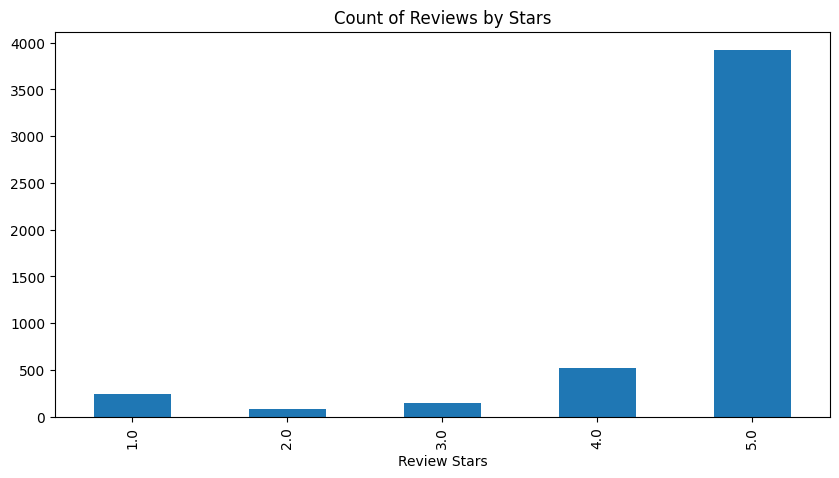

In [ ]:
ax = ar['overall'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

Majority of the customers gave 5 star reviews

<ipython-input-14-d6a6e1f22cdb>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=ar_cln, palette='viridis')


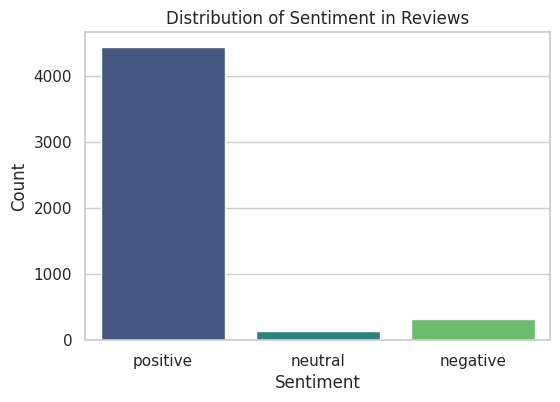

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a count plot for sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=ar_cln, palette='viridis')
plt.title('Distribution of Sentiment in Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Most of the reviews were positive

# **STEP 5: BASIC NLTK**



In [ ]:
# Libraries
import nltk
!pip install svgling
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
# Example
example=ar_cln['reviewText'][2]
print(example)

it works as expected. I should have sprung for the higher capacity.  I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before


In [ ]:
# Tokenizing
tkn=word_tokenize(example)
tkn[:10]

['it', 'works', 'as', 'expected', '.', 'I', 'should', 'have', 'sprung', 'for']

In [ ]:
# Speech Tagging
tag=nltk.pos_tag(tkn)
tag[:10]

[('it', 'PRP'),
 ('works', 'VBZ'),
 ('as', 'IN'),
 ('expected', 'VBN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('should', 'MD'),
 ('have', 'VB'),
 ('sprung', 'NN'),
 ('for', 'IN')]

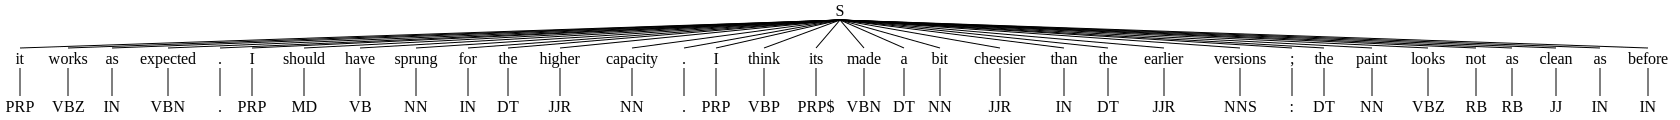

In [ ]:
# Chunking
ent=nltk.chunk.ne_chunk(tag)
ent

# **STEP 6: MODELLING**

Using classification algorithms; Decision Tree, Random Forest, SVC and Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Vectorize the review text using TF-IDF (converting text into numerical form for modelling)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(ar_cln['reviewText']).toarray()

# Encode the sentiment labels (converting categorical labels to numerical labels)
le = LabelEncoder()
y = le.fit_transform(ar_cln['sentiment'])

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)










# **STEP 7: EVALUATION**

In [ ]:
# Libraries
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Evaluation for classification
classification_models = ['Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes']
classification_predictions = [y_pred_dt, y_pred_rf, y_pred_svm, y_pred_nb]
classification_results = {}

for model, pred in zip(classification_models, classification_predictions):
    report = classification_report(y_test, pred, output_dict=True)
    classification_results[model] = {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }

classification_results_df = pd.DataFrame(classification_results).T
print(classification_results_df)

               Accuracy  Precision    Recall  F1 Score
Decision Tree  0.872838   0.863394  0.872838  0.867537
Random Forest  0.908444   0.891419  0.908444  0.867663
SVM            0.932859   0.907278  0.932859  0.914082
Naive Bayes    0.901322   0.819384  0.901322  0.858402


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

**Accuracy**

SVM is the most accurate (0.932859) followed by Random Forest (0.908444) then Naive Bayes (0.901322) and lastly Decision Tree (0.872838)  


**Precision**

SVM has the highest precision (0.907278), meaning it makes the fewest false positive errors among the models while Naive Bayes has the lowest precision (0.819384), indicating more false positives compared to the other models.

**Recall**

SVM again performs best (0.932859) with the highest recall, meaning it captures almost all the true positives while Naive Bayes comes in second for recall (0.901322), showing that while it catches a lot of true positives, it makes more false positive predictions (as seen in its precision score).

**F1-Score**

SVM has the best F1-score (0.914082), meaning it balances precision and recall most effectively.

Naive Bayes has the lowest F1-score (0.858402), showing that while its recall is good, its precision drags down its overall performance.

Decision Tree and Random Forest have similar F1-scores (around 0.867), with Random Forest having a slightly better recall than the Decision Tree, but precision is almost equal.

**Summary**

SVM is the best overall model, excelling in accuracy, precision, recall, and thus achieving the highest F1 score.
Random Forest and Decision Tree perform similarly, though Random Forest slightly outperforms Decision Tree in recall, accuracy and precision.
Naive Bayes has the highest recall after SVM but suffers in precision, which leads to a lower F1 score compared to the other models.


# **Visualization of the Results**

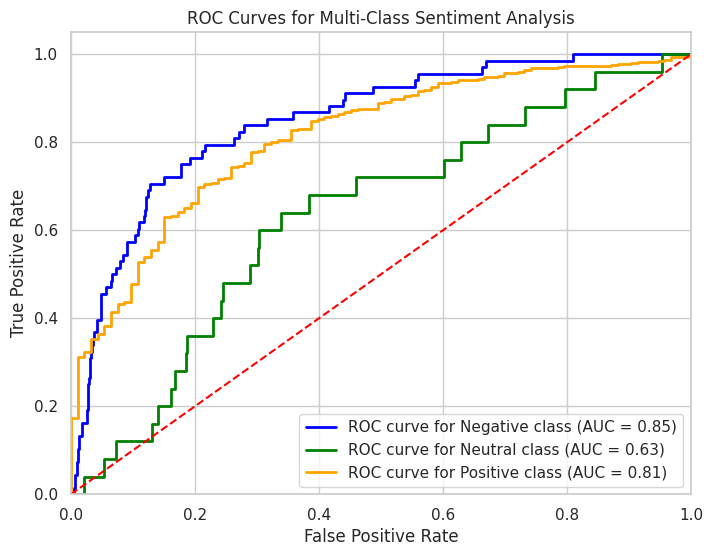

AUC for Negative class: 0.85
AUC for Neutral class: 0.63
AUC for Positive class: 0.81


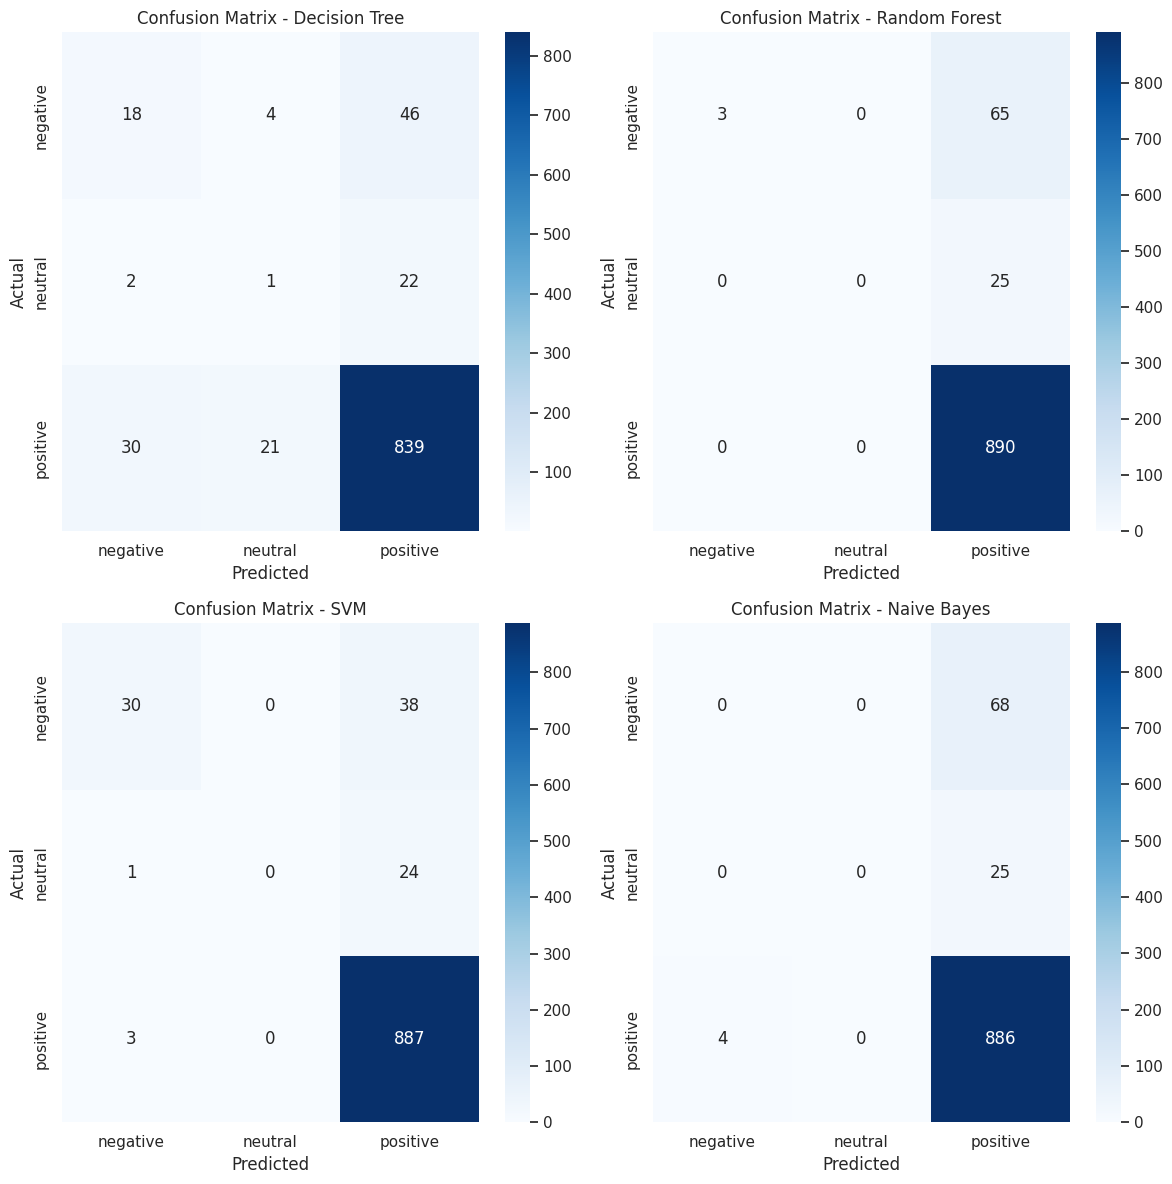

In [ ]:
# Import additional libraries for visualization
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import OneHotEncoder

# Binarizing the sentiment column to compute ROC for each class
y = label_binarize(ar_cln['sentiment'], classes=['negative', 'neutral', 'positive'])
n_classes = y.shape[1]


# Predict probabilities for each class( based on Naive Bayes)
y_proba = nb_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Encoding to convert categorical data into a one-hot encoded format.
encoder = OneHotEncoder(sparse_output=False)
y_test_onehot = encoder.fit_transform(y_test.reshape(-1, 1))

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_onehot[:, i], y_proba[:, i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'orange']
classes = ['Negative', 'Neutral', 'Positive']

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve for {classes[i]} class (AUC = {roc_auc[i]:.2f})')

# Plotting diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-Class Sentiment Analysis')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC values for each class
for i in range(n_classes):
    print(f"AUC for {classes[i]} class: {roc_auc[i]:.2f}")

# Confusion Matrix for each classifier
models = ['Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes']
predictions = [y_pred_dt, y_pred_rf, y_pred_svm, y_pred_nb]

# Create subplots for each confusion matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, model, pred in zip(axes, models, predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set_title(f'Confusion Matrix - {model}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

**AUC and ROC curves**

Negative Class (AUC = 0.85): Strong performance in identifying negative reviews.

Neutral Class (AUC = 0.63): Moderate performance, and the model struggles more with neutral reviews, possibly due to overlap with other classes.

Positive Class (AUC = 0.81): Good performance in distinguishing positive reviews.



**Decision Tree**:


The Decision Tree struggles with the neutral class, as seen by its low accuracy (1 correct prediction). It also misclassifies some negative and neutral instances as positive but generally performs well on positive class predictions (839 correct out of 890 total positive instances).

**Random Forest**:

The Random Forest model is more conservative, with almost all predictions in the positive class (890 correct). However, it struggles with the negative and neutral classes, often misclassifying them as positive (e.g., 65 negative and 25 neutral instances were labeled as positive). It also fails to classify any neutral instances correctly.

**Support Vector Machine**:

Positive class: SVC performs well with the positive class, correctly classifying 887 out of 890 instances. However, a small number of negative (38) and neutral (24) instances are misclassified as positive.
Negative class: The model struggles with the negative class, with 38 misclassified as positive, though it correctly predicts 30 negative instances.
Neutral class: The SVC model fails to classify any neutral instances correctly (0), as almost all are predicted as positive.

**Naive Bayes**:

Positive class: Naive Bayes also performs very well on the positive class, correctly classifying 886 instances. Similar to the SVC, it has trouble distinguishing other classes from positive, with all negative and neutral instances being classified as positive.
Negative and Neutral classes: Naive Bayes performs poorly on both the negative and neutral classes, misclassifying all of them as positive. No negative or neutral instance is correctly classified.

# **STEP 8: DEPLOYMENT**